In [1]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import yfinance as yf

%matplotlib inline

# MAKE THIS INTO A DASHBOARD SITUATION

In [3]:
# 5 years of Open, High, Low, Close, and Volume
# three companies TCS, Infosys, and Wipro

In [4]:
start = "2017-01-01"
end = '2022-1-01'
tcs = yf.download('TCS',start,end)
infy = yf.download('INFY',start,end)
wipro = yf.download('WIPRO.NS',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


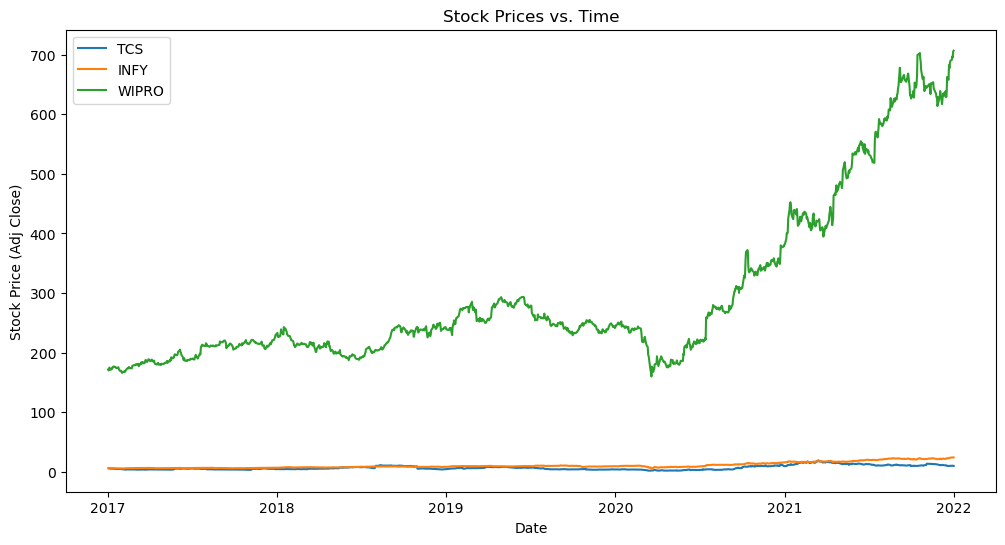

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stock prices vs. time for TCS
ax.plot(tcs.index, tcs['Adj Close'], label='TCS')

# Plot the stock prices vs. time for INFY
ax.plot(infy.index, infy['Adj Close'], label='INFY')

# Plot the stock prices vs. time for WIPRO
ax.plot(wipro.index, wipro['Adj Close'], label='WIPRO')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price (Adj Close)')
ax.set_title('Stock Prices vs. Time')
ax.legend()

# Show the plot
plt.show()

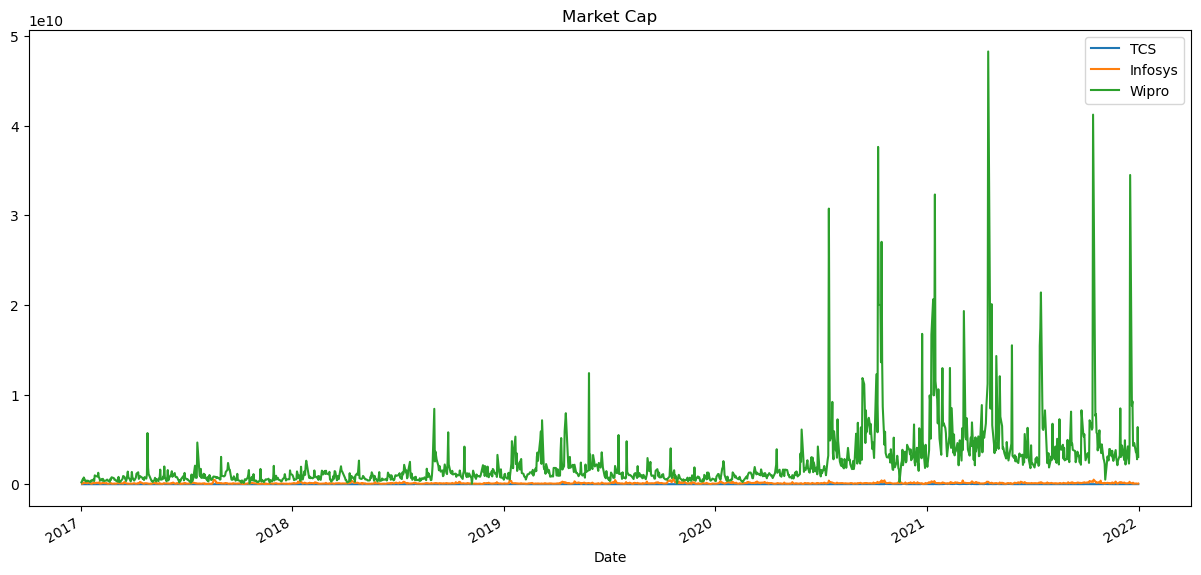

In [5]:
#Market Capitalisation
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
tcs['MarktCap'].plot(label = 'TCS', figsize = (15,7))
infy['MarktCap'].plot(label = 'Infosys')
wipro['MarktCap'].plot(label = 'Wipro')
plt.title('Market Cap')
plt.legend()

<Axes: xlabel='Date'>

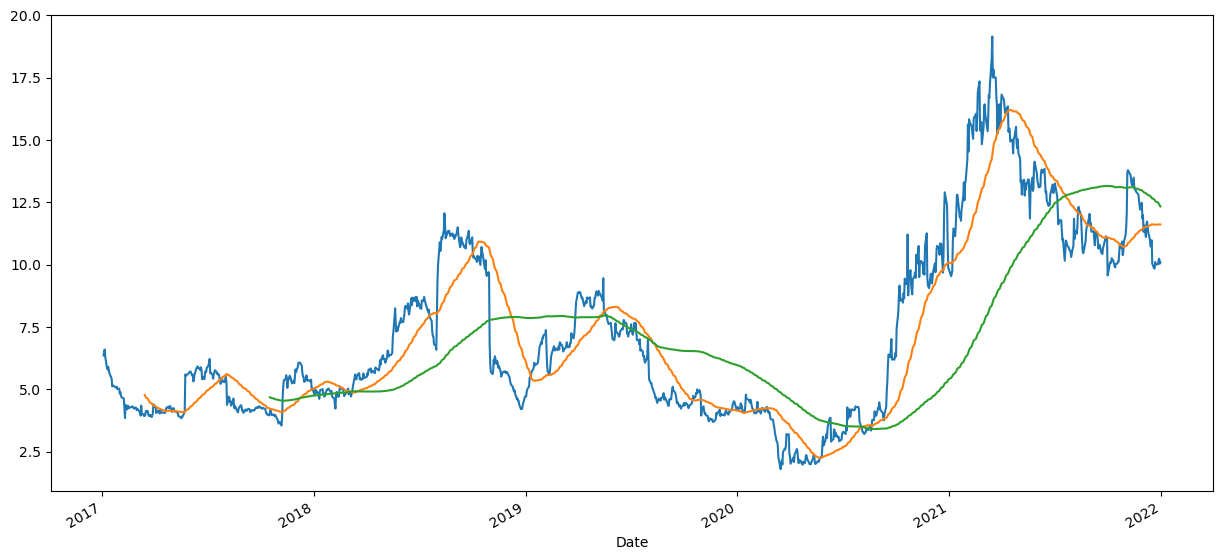

In [6]:
#50 and 200 day moving averages
tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA200'] = tcs['Open'].rolling(200).mean()
tcs['Open'].plot(figsize = (15,7))
tcs['MA50'].plot()
tcs['MA200'].plot()

array([[<Axes: xlabel='TCSOpen', ylabel='TCSOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='TCSOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='TCSOpen'>],
       [<Axes: xlabel='TCSOpen', ylabel='InfosysOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='InfosysOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='InfosysOpen'>],
       [<Axes: xlabel='TCSOpen', ylabel='WiproOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='WiproOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='WiproOpen'>]], dtype=object)

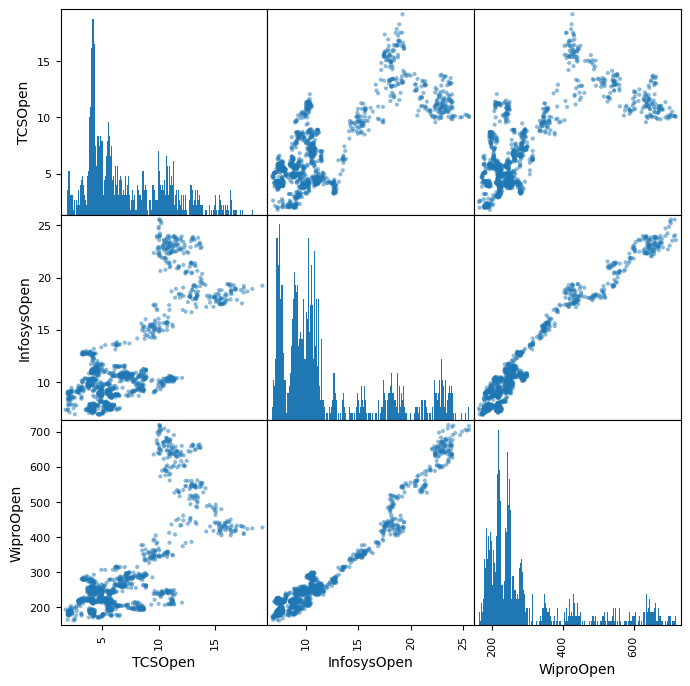

In [7]:
# scatter plot matrix
# see correlation of prices 
data = pd.concat([tcs['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['TCSOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

# infosys is linearly correlated with wipro

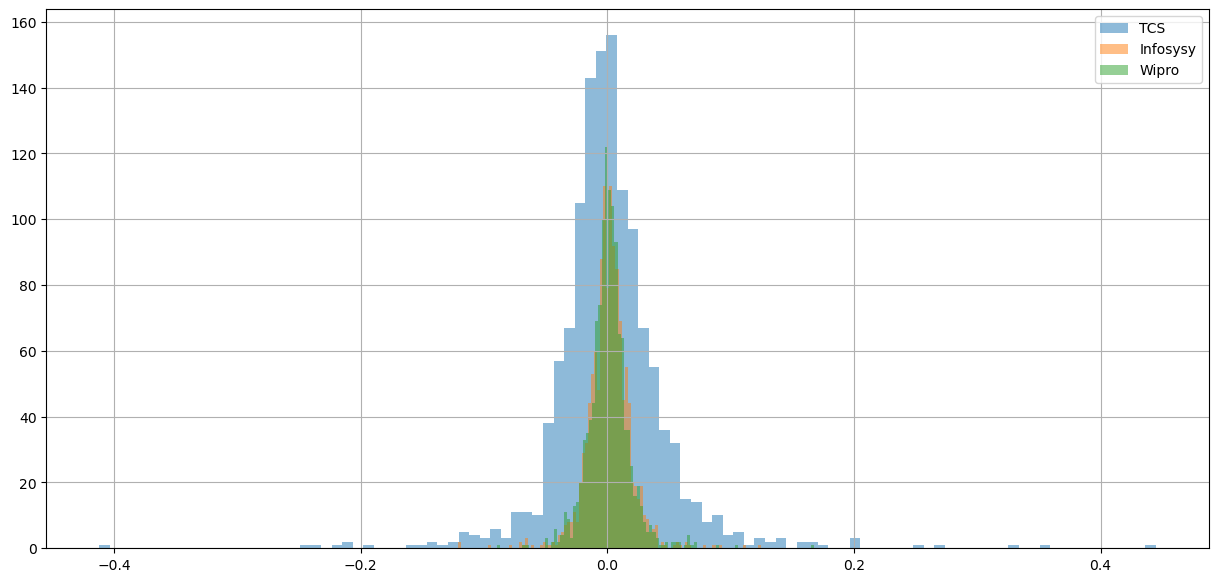

In [8]:
#Volatility
# how much it jumped in a single day
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,7))
infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()

In [ ]:
#https://pypi.org/project/yfinance/
tickers = yf.Tickers('msft aapl goog')
# access each ticker using (example)
#tickers.tickers['MSFT'].info
#tickers.tickers['AAPL'].history(period="1mo")
#tickers.tickers['GOOG'].actions
# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

#if get rated limited use a proxy
msft.history(..., proxy="PROXY_SERVER")

In [12]:
import pandas as pd

# Replace 'your_file.txt' with the actual path to your text file
file_path = 'samplegoogle.txt'

# Read the tab-delimited text file into a DataFrame
df = pd.read_csv(file_path, delimiter=',')  # Use '\t' for tab delimiter

# Now, 'df' is a DataFrame containing the data from the text file


In [13]:
df.head(5)

,2023-05-12 04:00:00.003,116.84,100,1,117.05,100.1,1.1
0,2023-05-12 04:00:00.020,117.19,100,7,117.05,100,1
1,2023-05-12 04:00:00.101,117.19,100,7,117.39,4200,8
2,2023-05-12 04:00:00.150,117.19,100,7,117.26,100,1
3,2023-05-12 04:00:00.207,117.19,100,7,117.19,500,8
4,2023-05-12 04:00:00.207,117.02,400,7,117.19,500,8


In [ ]:
#Trade Data : 
# {timestamp yyyy-MM-dd HH:mm:ss.ssssss},{price},{volume},{exchange code (see below)},{trade conditions (see below)}

#Quote Data : 
# {timestamp yyyy-MM-dd HH:mm:ss.ssssss},{bid price},{bid volume},{bid exchange},{offer price},{offer volume},{offer exchange},{offer price}
 